# Explore here

It's recommended to use this notebook for exploration purposes.

In [1]:
pip install pandas requests


Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


Step 2: Download HTML

In [2]:
import requests
import time

url = " https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
html_page = requests.get(url, time.sleep(10)).text

# If not information is extracted, then connect as anonymous
if "We do not allow automated access to our servers" in html_page:
    headers = {"User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36"}
    request = requests.get(url, headers = headers)
    time.sleep(10)
    html_page = request.text

html_page

'\r\n<!DOCTYPE html>\r\n<!--[if lt IE 7]>      <html class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->\r\n<!--[if IE 7]>         <html class="no-js lt-ie9 lt-ie8"> <![endif]-->\r\n<!--[if IE 8]>         <html class="no-js lt-ie9"> <![endif]-->\r\n<!--[if gt IE 8]><!--> <html class="no-js"> <!--<![endif]-->\r\n    <head>\r\n        <meta charset="utf-8">\r\n        <meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">\r\n\t\t<link rel="canonical" href="https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue" />\r\n\t\t<title>Tesla Revenue 2010-2023 | TSLA | MacroTrends</title>\r\n\t\t<link rel="icon" type="image/x-icon" href="/assets/images/icons/FAVICON/macrotrends-favicon.ico">\r\n\t\t<meta name="description" content="Tesla annual/quarterly revenue history and growth rate from 2010 to 2023. Revenue can be defined as the amount of money a company receives from its customers in exchange for the sales of goods or services.  Revenue is the top line item on an income statement

Step 3: Transform the HTML

In [3]:
from bs4 import BeautifulSoup

soup = BeautifulSoup(request.text, 'html.parser')

soup


<!DOCTYPE html>

<!--[if lt IE 7]>      <html class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!--> <html class="no-js"> <!--<![endif]-->
<head>
<meta charset="utf-8"/>
<meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
<link href="https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue" rel="canonical"/>
<title>Tesla Revenue 2010-2023 | TSLA | MacroTrends</title>
<link href="/assets/images/icons/FAVICON/macrotrends-favicon.ico" rel="icon" type="image/x-icon"/>
<meta content="Tesla annual/quarterly revenue history and growth rate from 2010 to 2023. Revenue can be defined as the amount of money a company receives from its customers in exchange for the sales of goods or services.  Revenue is the top line item on an income statement from which all costs and expenses are subtracted to arrive at net income.    
				
				&

In [4]:
# Find all the tables:

all_tables = soup.find_all("table")

all_tables

[<table class="historical_data_table table">
 <thead>
 <tr>
 <th colspan="2" style="text-align:center">Tesla Annual Revenue<br/><span style="font-size:14px;">(Millions of US $)</span></th>
 </tr>
 </thead>
 <tbody>
 <tr>
 <td style="text-align:center">2023</td>
 <td style="text-align:center">$96,773</td>
 </tr>
 <tr>
 <td style="text-align:center">2022</td>
 <td style="text-align:center">$81,462</td>
 </tr>
 <tr>
 <td style="text-align:center">2021</td>
 <td style="text-align:center">$53,823</td>
 </tr>
 <tr>
 <td style="text-align:center">2020</td>
 <td style="text-align:center">$31,536</td>
 </tr>
 <tr>
 <td style="text-align:center">2019</td>
 <td style="text-align:center">$24,578</td>
 </tr>
 <tr>
 <td style="text-align:center">2018</td>
 <td style="text-align:center">$21,461</td>
 </tr>
 <tr>
 <td style="text-align:center">2017</td>
 <td style="text-align:center">$11,759</td>
 </tr>
 <tr>
 <td style="text-align:center">2016</td>
 <td style="text-align:center">$7,000</td>
 </tr>
 <

In [5]:
# Find the table with the quarterly evolution:

html_table = '''<table class="historical_data_table table">
 <thead>
 <tr>
 <th colspan="2" style="text-align:center">Tesla Quarterly Revenue<br/><span style="font-size:14px;">(Millions of US $)</span></th>
 </tr>
 </thead>
 <tbody>
 <tr>
 <td style="text-align:center">2023-06-30</td>
 <td style="text-align:center">$24,927</td>
 </tr>
 <tr>
 <td style="text-align:center">2023-03-31</td>
 <td style="text-align:center">$23,329</td>
 </tr>
 <tr>
 <td style="text-align:center">2022-12-31</td>
 <td style="text-align:center">$24,318</td>
 </tr>
 <tr>
 <td style="text-align:center">2022-09-30</td>
 <td style="text-align:center">$21,454</td>
 </tr>
 <tr>
 <td style="text-align:center">2022-06-30</td>
 <td style="text-align:center">$16,934</td>
 </tr>
 <tr>
 <td style="text-align:center">2022-03-31</td>
 <td style="text-align:center">$18,756</td>
 </tr>
 <tr>
 <td style="text-align:center">2021-12-31</td>
 <td style="text-align:center">$17,719</td>
 </tr>
 <tr>
 <td style="text-align:center">2021-09-30</td>
 <td style="text-align:center">$13,757</td>
 </tr>
 <tr>
 <td style="text-align:center">2021-06-30</td>
 <td style="text-align:center">$11,958</td>
 </tr>
 <tr>
 <td style="text-align:center">2021-03-31</td>
 <td style="text-align:center">$10,389</td>
 </tr>
 <tr>
 <td style="text-align:center">2020-12-31</td>
 <td style="text-align:center">$10,744</td>
 </tr>
 <tr>
 <td style="text-align:center">2020-09-30</td>
 <td style="text-align:center">$8,771</td>
 </tr>
 <tr>
 <td style="text-align:center">2020-06-30</td>
 <td style="text-align:center">$6,036</td>
 </tr>
 <tr>
 <td style="text-align:center">2020-03-31</td>
 <td style="text-align:center">$5,985</td>
 </tr>
 <tr>
 <td style="text-align:center">2019-12-31</td>
 <td style="text-align:center">$7,384</td>
 </tr>
 <tr>
 <td style="text-align:center">2019-09-30</td>
 <td style="text-align:center">$6,303</td>
 </tr>
 <tr>
 <td style="text-align:center">2019-06-30</td>
 <td style="text-align:center">$6,350</td>
 </tr>
 <tr>
 <td style="text-align:center">2019-03-31</td>
 <td style="text-align:center">$4,541</td>
 </tr>
 <tr>
 <td style="text-align:center">2018-12-31</td>
 <td style="text-align:center">$7,226</td>
 </tr>
 <tr>
 <td style="text-align:center">2018-09-30</td>
 <td style="text-align:center">$6,824</td>
 </tr>
 <tr>
 <td style="text-align:center">2018-06-30</td>
 <td style="text-align:center">$4,002</td>
 </tr>
 <tr>
 <td style="text-align:center">2018-03-31</td>
 <td style="text-align:center">$3,409</td>
 </tr>
 <tr>
 <td style="text-align:center">2017-12-31</td>
 <td style="text-align:center">$3,288</td>
 </tr>
 <tr>
 <td style="text-align:center">2017-09-30</td>
 <td style="text-align:center">$2,985</td>
 </tr>
 <tr>
 <td style="text-align:center">2017-06-30</td>
 <td style="text-align:center">$2,790</td>
 </tr>
 <tr>
 <td style="text-align:center">2017-03-31</td>
 <td style="text-align:center">$2,696</td>
 </tr>
 <tr>
 <td style="text-align:center">2016-12-31</td>
 <td style="text-align:center">$2,285</td>
 </tr>
 <tr>
 <td style="text-align:center">2016-09-30</td>
 <td style="text-align:center">$2,298</td>
 </tr>
 <tr>
 <td style="text-align:center">2016-06-30</td>
 <td style="text-align:center">$1,270</td>
 </tr>
 <tr>
 <td style="text-align:center">2016-03-31</td>
 <td style="text-align:center">$1,147</td>
 </tr>
 <tr>
 <td style="text-align:center">2015-12-31</td>
 <td style="text-align:center">$1,214</td>
 </tr>
 <tr>
 <td style="text-align:center">2015-09-30</td>
 <td style="text-align:center">$937</td>
 </tr>
 <tr>
 <td style="text-align:center">2015-06-30</td>
 <td style="text-align:center">$955</td>
 </tr>
 <tr>
 <td style="text-align:center">2015-03-31</td>
 <td style="text-align:center">$940</td>
 </tr>
 <tr>
 <td style="text-align:center">2014-12-31</td>
 <td style="text-align:center">$957</td>
 </tr>
 <tr>
 <td style="text-align:center">2014-09-30</td>
 <td style="text-align:center">$852</td>
 </tr>
 <tr>
 <td style="text-align:center">2014-06-30</td>
 <td style="text-align:center">$769</td>
 </tr>
 <tr>
 <td style="text-align:center">2014-03-31</td>
 <td style="text-align:center">$621</td>
 </tr>
 <tr>
 <td style="text-align:center">2013-12-31</td>
 <td style="text-align:center">$615</td>
 </tr>
 <tr>
 <td style="text-align:center">2013-09-30</td>
 <td style="text-align:center">$431</td>
 </tr>
 <tr>
 <td style="text-align:center">2013-06-30</td>
 <td style="text-align:center">$405</td>
 </tr>
 <tr>
 <td style="text-align:center">2013-03-31</td>
 <td style="text-align:center">$562</td>
 </tr>
 <tr>
 <td style="text-align:center">2012-12-31</td>
 <td style="text-align:center">$306</td>
 </tr>
 <tr>
 <td style="text-align:center">2012-09-30</td>
 <td style="text-align:center">$50</td>
 </tr>
 <tr>
 <td style="text-align:center">2012-06-30</td>
 <td style="text-align:center">$27</td>
 </tr>
 <tr>
 <td style="text-align:center">2012-03-31</td>
 <td style="text-align:center">$30</td>
 </tr>
 <tr>
 <td style="text-align:center">2011-12-31</td>
 <td style="text-align:center">$39</td>
 </tr>
 <tr>
 <td style="text-align:center">2011-09-30</td>
 <td style="text-align:center">$58</td>
 </tr>
 <tr>
 <td style="text-align:center">2011-06-30</td>
 <td style="text-align:center">$58</td>
 </tr>
 <tr>
 <td style="text-align:center">2011-03-31</td>
 <td style="text-align:center">$49</td>
 </tr>
 <tr>
 <td style="text-align:center">2010-12-31</td>
 <td style="text-align:center">$36</td>
 </tr>
 <tr>
 <td style="text-align:center">2010-09-30</td>
 <td style="text-align:center">$31</td>
 </tr>
 <tr>
 <td style="text-align:center">2010-06-30</td>
 <td style="text-align:center">$28</td>
 </tr>
 <tr>
 <td style="text-align:center">2010-03-31</td>
 <td style="text-align:center">$21</td>
 </tr>
 <tr>
 <td style="text-align:center">2009-12-31</td>
 <td style="text-align:center"></td>
 </tr>
 <tr>
 <td style="text-align:center">2009-09-30</td>
 <td style="text-align:center">$46</td>
 </tr>
 <tr>
 <td style="text-align:center">2009-06-30</td>
 <td style="text-align:center">$27</td>
 </tr>
 </tbody>
 </table>'''

Step 4: Process the DataFrame

In [6]:
# Store the data in a DataFrame:

import pandas as pd

original_table = pd.read_html(html_table)
#print(original_table)

Date = original_table[0]["Tesla Quarterly Revenue(Millions of US $)"].tolist()
Revenue = original_table[0]["Tesla Quarterly Revenue(Millions of US $).1"].str.replace("$", "").str.replace(",", "").tolist()

# Agregar los valores al DataFrame tesla_table:

tesla_table = pd.DataFrame(columns=["Date", "Revenue"])

tesla_table["Date"] = Date
tesla_table["Revenue"] = Revenue

# Quitando valores nulos:

tesla_table = tesla_table.dropna()
tesla_table


/tmp/ipykernel_539/1950484038.py:9: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  Revenue = original_table[0]["Tesla Quarterly Revenue(Millions of US $).1"].str.replace("$", "").str.replace(",", "").tolist()


,Date,Revenue
0,2023-06-30,24927
1,2023-03-31,23329
2,2022-12-31,24318
3,2022-09-30,21454
4,2022-06-30,16934
5,2022-03-31,18756
6,2021-12-31,17719
7,2021-09-30,13757
8,2021-06-30,11958
9,2021-03-31,10389


Step 5: Store the data in sqlite

In [7]:
import sqlite3

# Creación de la base de datos:

con = sqlite3.connect("Tesla_Revenue.db")
con

# Creación de la tabla Revenue:

#con.execute('''CREATE TABLE TESLA_REVENUE (Date , Revenue)''')
#con

#tesla_table.to_sql('TESLA_REVENUE', con, if_exists='replace', index=False)
#con

# Verificación de si los dados fueron almacenados en la tabla de SQlite:

for row in con.execute("SELECT * FROM TESLA_REVENUE"):
    print(row)

con.commit()


('2023-06-30', '24927')
('2023-03-31', '23329')
('2022-12-31', '24318')
('2022-09-30', '21454')
('2022-06-30', '16934')
('2022-03-31', '18756')
('2021-12-31', '17719')
('2021-09-30', '13757')
('2021-06-30', '11958')
('2021-03-31', '10389')
('2020-12-31', '10744')
('2020-09-30', '8771')
('2020-06-30', '6036')
('2020-03-31', '5985')
('2019-12-31', '7384')
('2019-09-30', '6303')
('2019-06-30', '6350')
('2019-03-31', '4541')
('2018-12-31', '7226')
('2018-09-30', '6824')
('2018-06-30', '4002')
('2018-03-31', '3409')
('2017-12-31', '3288')
('2017-09-30', '2985')
('2017-06-30', '2790')
('2017-03-31', '2696')
('2016-12-31', '2285')
('2016-09-30', '2298')
('2016-06-30', '1270')
('2016-03-31', '1147')
('2015-12-31', '1214')
('2015-09-30', '937')
('2015-06-30', '955')
('2015-03-31', '940')
('2014-12-31', '957')
('2014-09-30', '852')
('2014-06-30', '769')
('2014-03-31', '621')
('2013-12-31', '615')
('2013-09-30', '431')
('2013-06-30', '405')
('2013-03-31', '562')
('2012-12-31', '306')
('2012-09-30

Step 6: Visualize the data

6.1: Tesla's revenue all over the years:

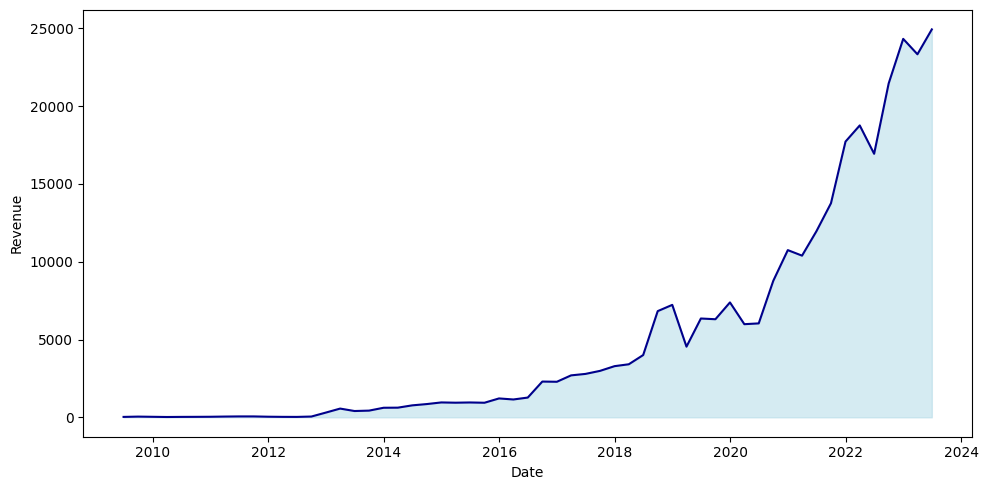

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(figsize = (10, 5))

tesla_table["Date"] = pd.to_datetime(tesla_table["Date"])
tesla_table["Revenue"] = tesla_table["Revenue"].astype('int')

sns.lineplot(data = tesla_table, x = "Date", y = "Revenue" , color = "darkblue")
plt.fill_between(tesla_table["Date"], tesla_table["Revenue"], color='lightblue', alpha=0.5)
plt.tight_layout()
plt.show()

6.2: Tesla's anual gross revenue:

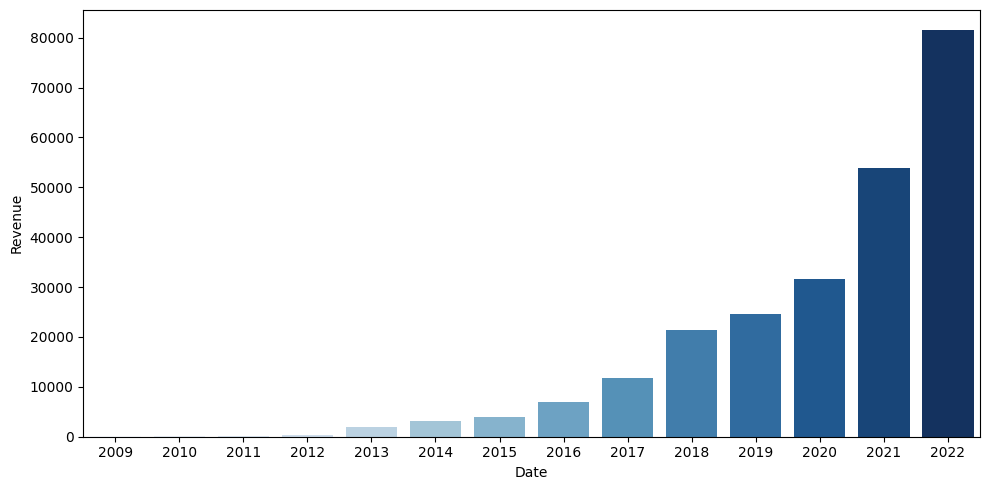

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(figsize = (10, 5))

tesla_table["Date"] = pd.to_datetime(tesla_table["Date"])
tesla_anual_revenue = tesla_table.groupby(tesla_table["Date"].dt.year).sum().reset_index()

sns.barplot(data = tesla_anual_revenue[tesla_anual_revenue['Date'] < 2023] , x = "Date", y = "Revenue" , hue = "Date" , palette = "Blues", legend = False)
plt.tight_layout()
plt.show()



6.3: Top 5 trimesters revenue:

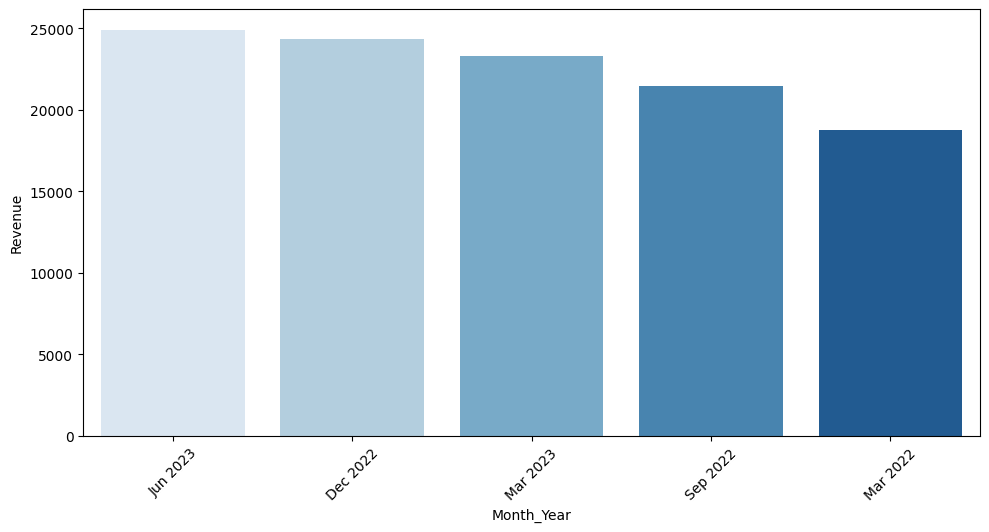

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(figsize = (10, 5))

tesla_table["Month_Year"] = tesla_table["Date"].dt.strftime('%b %Y')
top5_trimesters = tesla_table.nlargest(5, "Revenue").reset_index()

sns.barplot(data = top5_trimesters , x = "Month_Year", y = "Revenue" , hue = "Date" , palette = "Blues", legend = False)
plt.tight_layout()
plt.xticks(rotation = 45)
plt.show()


